<a href="https://colab.research.google.com/github/imeldaslsbl/DecisionTree-vs-RandomForest/blob/main/Python_Departement_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Memanggil dataset departement_sales.csv mengunakan function pandas yaitu read_csv()
df_sales = pd.read_csv("departement_sales.csv")
df_sales

,user_id,gender,order_id,product_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item
0,33153,F,41038,13606,Shipped,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1
1,56200,F,69979,13606,Shipped,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1
2,35515,F,44006,13606,Complete,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3
3,47846,F,59418,13606,Cancelled,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2
4,22712,F,28129,13606,Processing,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1
...,...,...,...,...,...,...,...,...,...,...,...
180503,72462,F,90332,146,Complete,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1
180504,14910,F,18386,3633,Cancelled,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1
180505,74538,F,92879,3633,Processing,2021-12-13 05:53:52+00:00,NaN,NaN,NaN,9.32,4
180506,94127,F,117130,3449,Shipped,2020-12-08 04:56:12+00:00,2020-12-04 17:42:00+00:00,NaN,NaN,9.82,4


In [ ]:
# Mengetahui tipe data, jumlah baris, jumlah kolom, dan kelengkapan isi data (Non-Null)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       180508 non-null  int64  
 1   gender        180508 non-null  object 
 2   order_id      180508 non-null  int64  
 3   product_id    180508 non-null  int64  
 4   status        180508 non-null  object 
 5   created_at    180508 non-null  object 
 6   shipped_at    117502 non-null  object 
 7   delivered_at  63035 non-null   object 
 8   returned_at   17752 non-null   object 
 9   sale_price    180508 non-null  float64
 10  num_of_item   180508 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 15.1+ MB


- Terdiri dari 180508 baris dan 11 kolom.
- Terdapat 1 variabel bertipe float, 4 variabel bertipe integer, dan 6 variabel bertipe object.
- Terdapat missing value pada variabel shipped_at, delivered_at, dan returned_at.

In [ ]:
# Mengetahui apakah ada baris yang duplikat
df_sales.duplicated(subset=None)

0         False
1         False
2         False
3         False
4         False
          ...  
180503    False
180504    False
180505    False
180506    False
180507    False
Length: 180508, dtype: bool

Tidak terdapat data duplikat.

# 2 Exploratory Data Analysis (EDA)

In [ ]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df_sales.select_dtypes(include="number").columns.tolist()
categorical_features = df_sales.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
print(numerical_features)
print("------------------------------------------------------------------------")
print("Categorical features:")
print(categorical_features)

Numerical features:
['user_id', 'order_id', 'product_id', 'sale_price', 'num_of_item']
------------------------------------------------------------------------
Categorical features:
['gender', 'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at']


## 2.1 Numerical Features

In [ ]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe()
df_sales[['sale_price', 'num_of_item']].describe().T

,count,mean,std,min,25%,50%,75%,max
sale_price,180508.0,59.799867,65.844662,0.02,24.9,39.990002,69.949997,999.0
num_of_item,180508.0,1.894021,1.058109,1.00,1.0,2.000000,2.000000,4.0


- Median dari sale_price lebih kecil daripada rata-rata nya, kemungkinan berdistribusi menceng kanan.
- Kebanyakan nilai sale_price dan num_of_item antara Q1 sampai Q3, kemungkinan terdapat pencilan.
- Harga produk tertinggi yang terjual yaitu 999.0 dan terendah yaitu 0.02
- Pembelian produk tertinggi yaitu 4 item dan terendah yaitu 1 item.

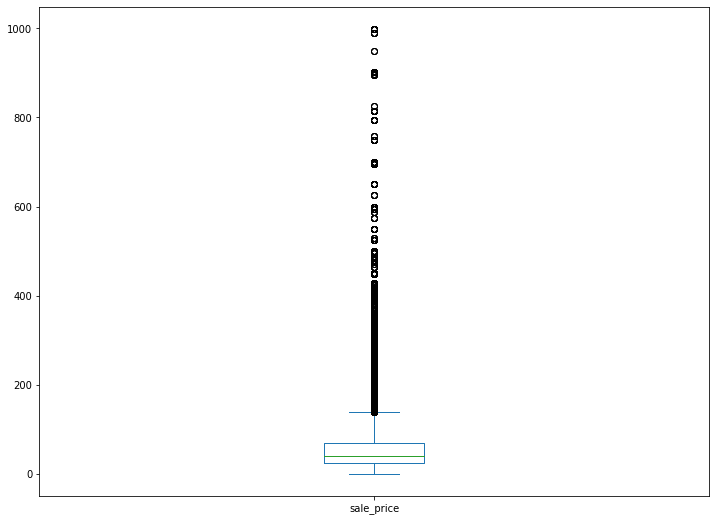

In [ ]:
# Visualisasi fitur-fitur numerik ke Boxplot untuk melihat bagaimana data tersebar
# Variabel sale_price
df_sales['sale_price'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

Data sale_price berdistribusi menceng kanan dan terdapat cukup banyak outlier.

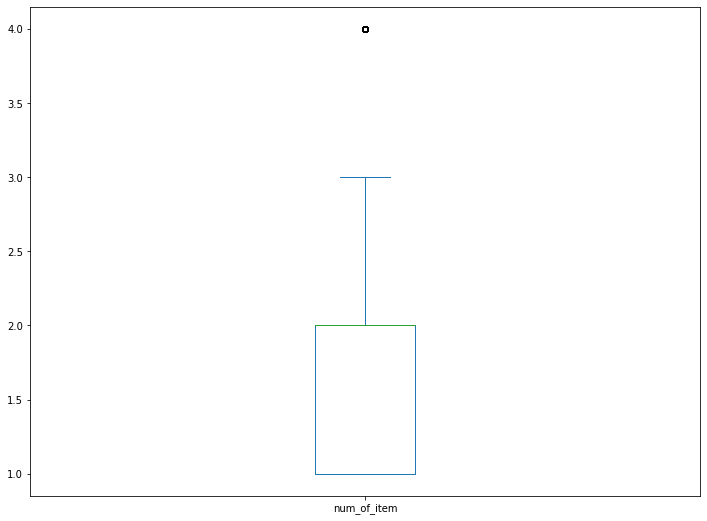

In [ ]:
# Variabel num_of_item
df_sales['num_of_item'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

Data num_of_item berdistribusi menceng kanan dan terdapat outlier.

In [ ]:
# Correlation
# Mengetahui hubungan dari fitur numerik
df_sales[['sale_price', 'num_of_item']].corr()

,sale_price,num_of_item
sale_price,1.000000,0.000763
num_of_item,0.000763,1.000000


Korelasi antara sale_price dan num_of_item terbilang sangat kecil, yaitu hanya sebesar 0.000763

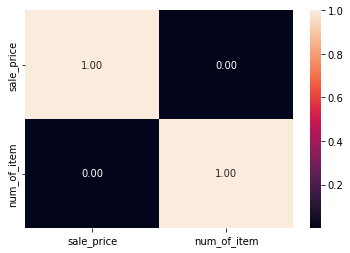

In [ ]:
# Visualisasikan correlation coefficient dengan heat map
sns.heatmap(df_sales[['sale_price', 'num_of_item']].corr(), annot=True, fmt=".2f")
plt.show()

## 2.2 Categorical Features

In [ ]:
# Memahami karakteristik data melalui fitur-fitur kategoris dengan function describe()
df_sales[categorical_features].describe().T

,count,unique,top,freq
gender,180508,2,M,90501
status,180508,5,Shipped,54467
created_at,180508,180172,2022-03-10 07:49:24+00:00,3
shipped_at,117502,77625,2022-04-24 07:03:00+00:00,10
delivered_at,63035,42494,2021-07-07 02:56:00+00:00,8
returned_at,17752,12065,2022-05-11 23:15:00+00:00,7


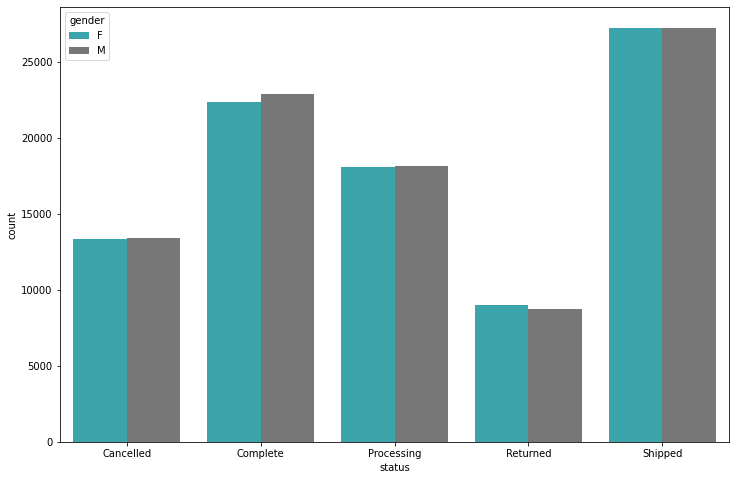

In [ ]:
# Membuat visualisasi berdasarkan status terhadap gender

plt.figure(figsize=(12, 8))
sns.countplot(
    x="status",
    data=df_sales,
    hue="gender",
    order=sorted(df_sales.status.unique()),
    palette=["#29B5BF"] + ["#777777"]
)
plt.grid(False)
plt.show()

- Status complete, cancelled,
dan processing lebih banyak
pada laki-laki.
- Status returned lebih banyak
pada perempuan.
- Status shipped terlihat
seimbang.

# 3 Data Cleaning

## Handling Outlier

In [ ]:
# Variabel sale_price
Q1 = df_sales['sale_price'].quantile(0.25)
Q3 = df_sales['sale_price'].quantile(0.75)
IQR = Q3-Q1

print('Shape awal:', df_sales.shape)
df_sales = df_sales[~((df_sales['sale_price'] < (Q1-1.5*IQR)) | (df_sales['sale_price'] > (Q3+1.5*IQR)))]
print('Shape akhir:', df_sales.shape)

Shape awal: (180508, 11)
Shape akhir: (164631, 11)


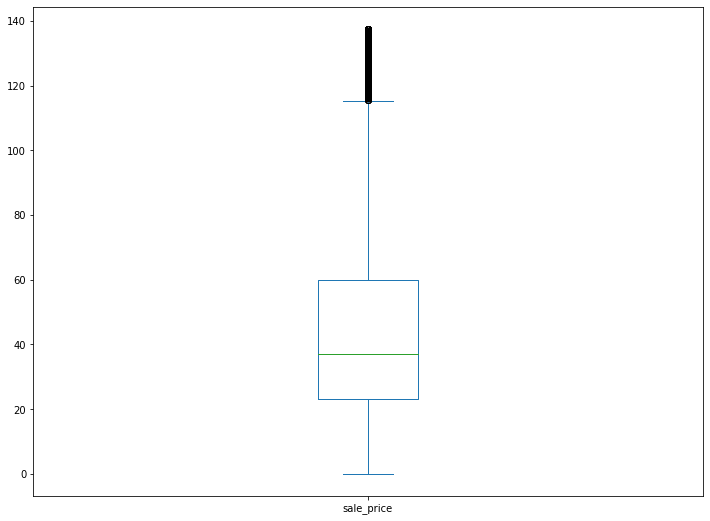

In [ ]:
# Variabel sale_price
df_sales['sale_price'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

Setelah dilakukan handling pada variabel sale_price, ternyata masih terdapat outlier.

In [ ]:
# Variabel num_of_item
Q1 = df_sales['num_of_item'].quantile(0.25)
Q3 = df_sales['num_of_item'].quantile(0.75)
IQR = Q3-Q1

print('Shape awal:', df_sales.shape)
df_sales = df_sales[~((df_sales['num_of_item'] < (Q1-1.5*IQR)) | (df_sales['num_of_item'] > (Q3+1.5*IQR)))]
print('Shape akhir:', df_sales.shape)

Shape awal: (164631, 11)
Shape akhir: (142211, 11)


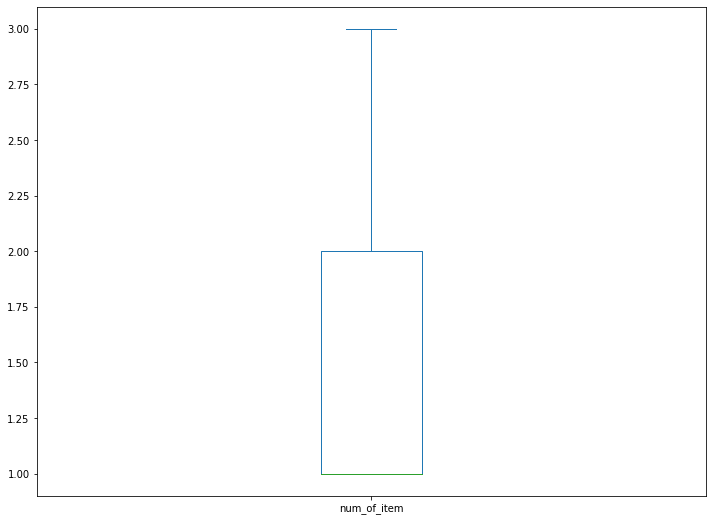

In [ ]:
# Variabel sale_price
df_sales['num_of_item'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

Setelah dilakukan handling pada variabel num_of_item, ternyata sudah bebas dari outlier.

# 4 Data Preparation

Pada data preparation akan dilakukan:
1. Membuat variabel status menjadi 2 kategori yaitu complete dan cancelled, dengan mengubah status processing dan shipped ke status complete, serta mengubah status returned ke status cancelled.
2. Encoding variabel status dan gender.

## 4.1 Mengubah status Processing dan shipped ke status Complete

In [ ]:
# Status processing ke complete
status_complete = df_sales['status']
status_complete = status_complete.replace('Processing', 'Complete')
status_complete

0           Shipped
1           Shipped
2          Complete
3         Cancelled
4          Complete
            ...    
180501      Shipped
180502      Shipped
180503     Complete
180504    Cancelled
180507     Complete
Name: status, Length: 142211, dtype: object

In [ ]:
dropdata = df_sales.drop(['status'], axis=1)
dropdata

,user_id,gender,order_id,product_id,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item
0,33153,F,41038,13606,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1
1,56200,F,69979,13606,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1
2,35515,F,44006,13606,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3
3,47846,F,59418,13606,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2
4,22712,F,28129,13606,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1
...,...,...,...,...,...,...,...,...,...,...
180501,14369,F,17713,146,2021-11-13 00:38:17+00:00,2021-11-13 10:55:00+00:00,NaN,NaN,9.32,1
180502,91134,F,113476,3633,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,9.32,1
180503,72462,F,90332,146,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1
180504,14910,F,18386,3633,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1


In [ ]:
sales = pd.concat([dropdata, status_complete], axis=1)
sales

,user_id,gender,order_id,product_id,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,status
0,33153,F,41038,13606,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1,Shipped
1,56200,F,69979,13606,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1,Shipped
2,35515,F,44006,13606,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3,Complete
3,47846,F,59418,13606,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2,Cancelled
4,22712,F,28129,13606,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1,Complete
...,...,...,...,...,...,...,...,...,...,...,...
180501,14369,F,17713,146,2021-11-13 00:38:17+00:00,2021-11-13 10:55:00+00:00,NaN,NaN,9.32,1,Shipped
180502,91134,F,113476,3633,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,9.32,1,Shipped
180503,72462,F,90332,146,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1,Complete
180504,14910,F,18386,3633,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1,Cancelled


In [ ]:
# Status shipped ke complete
status_complete = sales['status'].replace('Shipped', 'Complete')
status_complete

0          Complete
1          Complete
2          Complete
3         Cancelled
4          Complete
            ...    
180501     Complete
180502     Complete
180503     Complete
180504    Cancelled
180507     Complete
Name: status, Length: 142211, dtype: object

In [ ]:
dropdata2 = sales.drop(['status'], axis=1)
dropdata2

,user_id,gender,order_id,product_id,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item
0,33153,F,41038,13606,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1
1,56200,F,69979,13606,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1
2,35515,F,44006,13606,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3
3,47846,F,59418,13606,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2
4,22712,F,28129,13606,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1
...,...,...,...,...,...,...,...,...,...,...
180501,14369,F,17713,146,2021-11-13 00:38:17+00:00,2021-11-13 10:55:00+00:00,NaN,NaN,9.32,1
180502,91134,F,113476,3633,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,9.32,1
180503,72462,F,90332,146,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1
180504,14910,F,18386,3633,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1


In [ ]:
sales2 = pd.concat([dropdata2, status_complete], axis=1)
sales2

,user_id,gender,order_id,product_id,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,status
0,33153,F,41038,13606,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1,Complete
1,56200,F,69979,13606,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1,Complete
2,35515,F,44006,13606,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3,Complete
3,47846,F,59418,13606,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2,Cancelled
4,22712,F,28129,13606,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1,Complete
...,...,...,...,...,...,...,...,...,...,...,...
180501,14369,F,17713,146,2021-11-13 00:38:17+00:00,2021-11-13 10:55:00+00:00,NaN,NaN,9.32,1,Complete
180502,91134,F,113476,3633,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,9.32,1,Complete
180503,72462,F,90332,146,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1,Complete
180504,14910,F,18386,3633,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1,Cancelled


## 4.2 Mengubah status Returned ke status Cancelled

In [ ]:
status_cancelled = sales2['status'].replace('Returned', 'Cancelled')
status_cancelled

0          Complete
1          Complete
2          Complete
3         Cancelled
4          Complete
            ...    
180501     Complete
180502     Complete
180503     Complete
180504    Cancelled
180507     Complete
Name: status, Length: 142211, dtype: object

In [ ]:
dropdata3 = sales2.drop(['status'], axis=1)
dropdata3

,user_id,gender,order_id,product_id,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item
0,33153,F,41038,13606,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1
1,56200,F,69979,13606,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1
2,35515,F,44006,13606,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3
3,47846,F,59418,13606,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2
4,22712,F,28129,13606,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1
...,...,...,...,...,...,...,...,...,...,...
180501,14369,F,17713,146,2021-11-13 00:38:17+00:00,2021-11-13 10:55:00+00:00,NaN,NaN,9.32,1
180502,91134,F,113476,3633,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,9.32,1
180503,72462,F,90332,146,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1
180504,14910,F,18386,3633,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1


In [ ]:
dt_sales = pd.concat([dropdata3, status_cancelled], axis=1)
dt_sales

,user_id,gender,order_id,product_id,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,status
0,33153,F,41038,13606,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1,Complete
1,56200,F,69979,13606,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1,Complete
2,35515,F,44006,13606,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3,Complete
3,47846,F,59418,13606,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2,Cancelled
4,22712,F,28129,13606,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1,Complete
...,...,...,...,...,...,...,...,...,...,...,...
180501,14369,F,17713,146,2021-11-13 00:38:17+00:00,2021-11-13 10:55:00+00:00,NaN,NaN,9.32,1,Complete
180502,91134,F,113476,3633,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,9.32,1,Complete
180503,72462,F,90332,146,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1,Complete
180504,14910,F,18386,3633,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1,Cancelled


## 4.3 Encoding

In [ ]:
# Variabel gender
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dt_sales['gender'] = labelencoder.fit_transform(dt_sales['gender'])
dt_sales = pd.get_dummies(dt_sales, columns=['gender'])
dt_sales

,user_id,order_id,product_id,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,status,gender_0,gender_1
0,33153,41038,13606,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1,Complete,1,0
1,56200,69979,13606,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1,Complete,1,0
2,35515,44006,13606,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3,Complete,1,0
3,47846,59418,13606,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2,Cancelled,1,0
4,22712,28129,13606,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1,Complete,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
180501,14369,17713,146,2021-11-13 00:38:17+00:00,2021-11-13 10:55:00+00:00,NaN,NaN,9.32,1,Complete,1,0
180502,91134,113476,3633,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,9.32,1,Complete,1,0
180503,72462,90332,146,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1,Complete,1,0
180504,14910,18386,3633,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1,Cancelled,1,0


In [ ]:
# Variabel status
dt_sales['status'] = labelencoder.fit_transform(dt_sales['status'])
dt_sales = pd.get_dummies(dt_sales, columns=['status'])
dt_sales

,user_id,order_id,product_id,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,gender_0,gender_1,status_0,status_1
0,33153,41038,13606,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.50,1,1,0,0,1
1,56200,69979,13606,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.50,1,1,0,0,1
2,35515,44006,13606,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.50,3,1,0,0,1
3,47846,59418,13606,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.50,2,1,0,1,0
4,22712,28129,13606,2021-07-26 04:06:18+00:00,NaN,NaN,NaN,2.50,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180501,14369,17713,146,2021-11-13 00:38:17+00:00,2021-11-13 10:55:00+00:00,NaN,NaN,9.32,1,1,0,0,1
180502,91134,113476,3633,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,9.32,1,1,0,0,1
180503,72462,90332,146,2021-03-15 07:56:47+00:00,2021-03-16 11:51:00+00:00,2021-03-17 07:55:00+00:00,NaN,9.32,1,1,0,0,1
180504,14910,18386,3633,2021-03-12 11:15:29+00:00,NaN,NaN,NaN,9.32,1,1,0,1,0


## 4.4 Mendefinisikan variabel independen (X)

In [ ]:
X1 = dt_sales[['gender_1']] # 0 = female, 1 = male
X2 = dt_sales[['num_of_item']]
X3 = dt_sales[['sale_price']]
X = pd.concat([X1, X2, X3], axis=1)
X

,gender_1,num_of_item,sale_price
0,0,1,2.50
1,0,1,2.50
2,0,3,2.50
3,0,2,2.50
4,0,1,2.50
...,...,...,...
180501,0,1,9.32
180502,0,1,9.32
180503,0,1,9.32
180504,0,1,9.32


## 4.5 Mendefinisikan variabel dependen (Y)

In [ ]:
Y = dt_sales[['status_0']] # 0 = complete, 1 = cancelled
Y

,status_0
0,0
1,0
2,0
3,1
4,0
...,...
180501,0
180502,0
180503,0
180504,1


## 4.6 Splitting Data

Melakukan splitting data yaitu data training dan testing dengan perbandingan 90:10

In [ ]:
from sklearn.model_selection import train_test_split
# Membagi proporsi data train 90% dan data test 10%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, stratify=Y, random_state=11)

print('training size:', X_train.shape[0])
print('test size:', X_test.shape[0])

training size: 127989
test size: 14222


# 5 Modelling



Tujuan dilakukan analisis adalah untuk mengetahui faktor-faktor yang mempengaruhi customer melakukan churn (cancelled dan returned). Akan dilakukan analisis menggunakan:
- Regresi Logistik Biner
- Klasifikasi Decision Tree
- Klasifikasi Random Forest

## 5.1 Regresi Logistik Biner

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients:  [[ 0.00615494  0.02860415 -0.00016279]]
Intercept:  [-1.14986266]


In [ ]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     10695
           1       0.00      0.00      0.00      3527

    accuracy                           0.75     14222
   macro avg       0.38      0.50      0.43     14222
weighted avg       0.57      0.75      0.65     14222

0.7520039375615244


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model regresi logistik biner memiliki nilai akurasi sebesar 75%. Namun untuk precision, recall, dan f1-score pada label **1** masih bernilai 0 yang artinya tidak mampu mendeteksi label **1** atau **cancelled**.

In [ ]:
# Odd ratio
intersep = np.exp(-1.14986266)
beta1 = np.exp(0.00615494) # gender
beta2 = np.exp(0.02860415) # num_of_item
beta3 = np.exp(-0.00016279) # sale_price
print('intersep: ', intersep)
print('beta1: ', beta1)
print('beta2: ', beta2)
print('beta3: ', beta3)

intersep:  0.31668025925934146
beta1:  1.0061739205646323
beta2:  1.029017177392754
beta3:  0.999837223249573


Interpretasi
- Peluang customer melakukan churn pada pemesanan meningkat 1.006 kali ketika bergender laki-laki.
- Peluang customer melakukan churn pada pemesanan meningkat 1.029 kali ketika jumlah produk bertambah 1 satuan.
- Peluang customer melakukan churn pada pemesanan menurun 0.999 kali ketika harga produk bertambah 1 satuan.

## 5.2 Klasifikasi Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model1 = DecisionTreeClassifier(
    max_depth=2, min_samples_split=int(1e3),
    random_state=11
)
# Generate modelnya dengan fit()
model1.fit(X_train, Y_train)

# Dengan menggunakan model yang sudah dibuat, hitung prediksi dengan menggunakan function predict() di tiap set
preds_train = model1.predict(X_train)
preds_test = model1.predict(X_test)

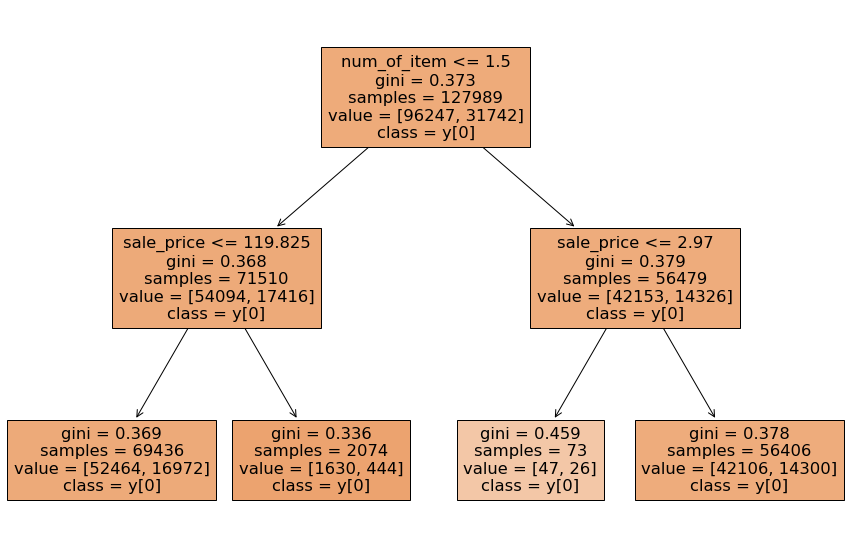

In [ ]:
# Visualisasi Decision Tree dengan hyperparameter yang sudah diatur dalam model1 diatas (max_depth=2)
plt.figure(figsize=(15, 10))
plot_tree(
    model1,
    feature_names=model1.feature_names_in_,
    class_names=True,
    filled=True,
)
plt.show()

Dari visualisasi decision tree terlihat num_of_item menjadi pengaruh utama dalam costumer melakukan chrun (cancelled dan returned), dilanjutkan dengan sale_price dan gender.

model1 performance on training set
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     96247
           1       0.00      0.00      0.00     31742

    accuracy                           0.75    127989
   macro avg       0.38      0.50      0.43    127989
weighted avg       0.57      0.75      0.65    127989



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


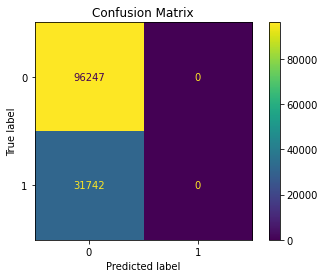

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score, \
                            recall_score, precision_score, f1_score
# Menampilkan Classification Report dan Confusion Matrix pada data train
print("model1 performance on training set")
print(classification_report(Y_train, preds_train))               # ---> Menjabarkan data dengan Classification Report

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_train, preds_train)    # ---> Menjabarkan data dengan Confusion Matrix
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

model1 performance on test set
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     10695
           1       0.00      0.00      0.00      3527

    accuracy                           0.75     14222
   macro avg       0.38      0.50      0.43     14222
weighted avg       0.57      0.75      0.65     14222



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


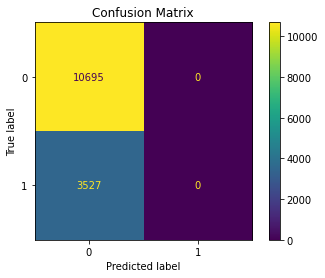

In [ ]:
# Menampilkan Classification Report dan Confusion Matrix pada data test
print("model1 performance on test set")
print(classification_report(Y_test, preds_test))               # ---> Menjabarkan data dengan Classification Report

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, preds_test)    # ---> Menjabarkan data dengan Confusion Matrix
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Model decision tree pada data training dan testing memiliki nilai akurasi sebesar 75%. Namun untuk precision, recall, dan f1-score pada label **1** masih bernilai 0 yang artinya tidak mampu mendeteksi label **1** atau **cancelled**.

## 5.3 Klasifikasi Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(class_weight='balanced', max_depth=10, min_samples_split=20, n_estimators=100)
model2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=20)

In [ ]:
# Melihat fitur yang paling berpengaruh dalam customer melakukan churn (Cancelled dan Returned)
feature_score = pd.Series(model2.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score

sale_price     0.963711
num_of_item    0.029916
gender_1       0.006372
dtype: float64

Terlihat sale_price menjadi variabel paling berpengaruh dalam costumer melakukan chrun (cancelled dan returned), dilanjutkan dengan variabel num_of_item dan gender.

model2 performance on training set
              precision    recall  f1-score   support

           0       0.79      0.60      0.68     96247
           1       0.30      0.50      0.37     31742

    accuracy                           0.58    127989
   macro avg       0.54      0.55      0.53    127989
weighted avg       0.67      0.58      0.61    127989



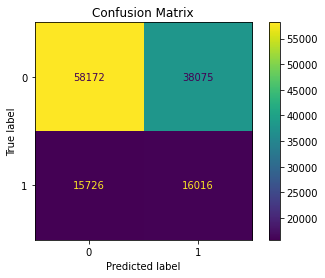

In [ ]:
Y_train_pred = model2.predict(X_train)
print("model2 performance on training set")
print(classification_report(Y_train, Y_train_pred))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_pred)    # ---> Menjabarkan data dengan Confusion Matrix
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Insight yang diperoleh dari evaluasi model pada data training adalah:
- Model random forest pada data training memiliki nilai akurasi sebesar 58%.
- Dari 31742 data yang berlabel **1** atau **cancelled**, model gagal memprediksi 15726 data dengan benar. Artinya, ada 15726 data yang seharusnya memiliki label cancelled tetapi model mengklasifikasikan sebagai label **0** atau **complete**.

model2 performance on test set
              precision    recall  f1-score   support

           0       0.75      0.57      0.65     10695
           1       0.25      0.43      0.32      3527

    accuracy                           0.54     14222
   macro avg       0.50      0.50      0.48     14222
weighted avg       0.63      0.54      0.57     14222



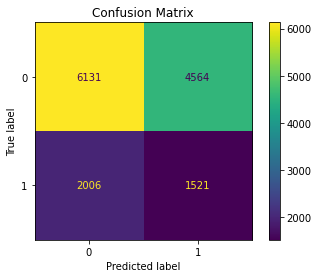

In [ ]:
Y_test_pred = model2.predict(X_test)
print("model2 performance on test set")
print(classification_report(Y_test, Y_test_pred))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)    # ---> Menjabarkan data dengan Confusion Matrix
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Insight yang diperoleh dari evaluasi model pada data testing adalah:
- Model random forest pada data testing memiliki nilai akurasi sebesar 54%.
- Dari 3527 data yang berlabel **1** atau **cancelled**, model gagal memprediksi 2006 data dengan benar. Artinya, ada 2006 data yang seharusnya memiliki label cancelled tetapi model mengklasifikasikan sebagai label **0** atau **complete**.

# 6 Evaluation

Dilihat dari confusion matrix untuk ketiga model yang dicoba yaitu regresi logistik biner, klasifikasi decision tree, dan klasifikasi random forest akan dipilih klasifikasi random forest. Dikarenakan klasifikasi random forest untuk precision, recall, dan f1-score sudah mampu mendeteksi label **1** atau **cancelled** tidak seperti model lainnya, serta memiliki nilai akurasi cukup tinggi.